# Modeling

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

## First lets bring in our data: seaborn Iris dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Next let's make a two new columns for petal area and sepal area

In [3]:
iris['petal_area'] = iris.petal_width * iris.petal_length
iris['sepal_area'] = iris.sepal_width * iris.sepal_length
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


## Next let's make predictions with KMeans

In [4]:
X = iris[['petal_area', 'sepal_area']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
5,5.4,3.9,1.7,0.4,setosa,0.68,21.06,cluster_2
36,5.5,3.5,1.3,0.2,setosa,0.26,19.25,cluster_2
65,6.7,3.1,4.4,1.4,versicolor,6.16,20.77,cluster_3
82,5.8,2.7,3.9,1.2,versicolor,4.68,15.66,cluster_3
7,5.0,3.4,1.5,0.2,setosa,0.30,17.00,cluster_2
18,5.7,3.8,1.7,0.3,setosa,0.51,21.66,cluster_2
75,6.6,3.0,4.4,1.4,versicolor,6.16,19.80,cluster_3
131,7.9,3.8,6.4,2.0,virginica,12.80,30.02,cluster_1
17,5.1,3.5,1.4,0.3,setosa,0.42,17.85,cluster_2
71,6.1,2.8,4.0,1.3,versicolor,5.20,17.08,cluster_3


# Lets see how our predictions turned out

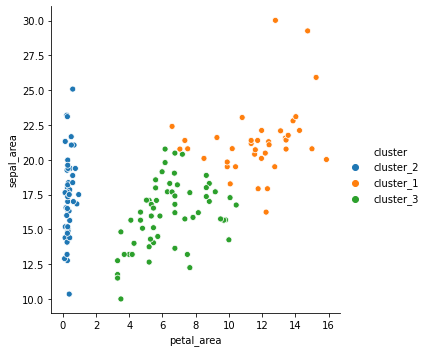

In [5]:
iris.cluster.astype('object')
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='cluster')

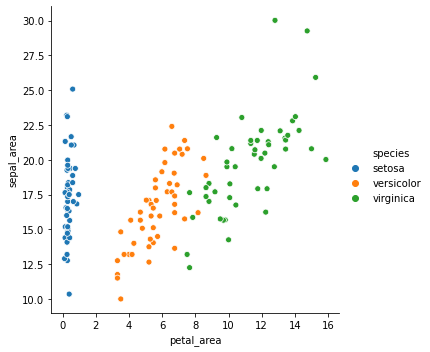

In [6]:
sns.relplot(data=iris, x='petal_area', y='sepal_area', hue='species')

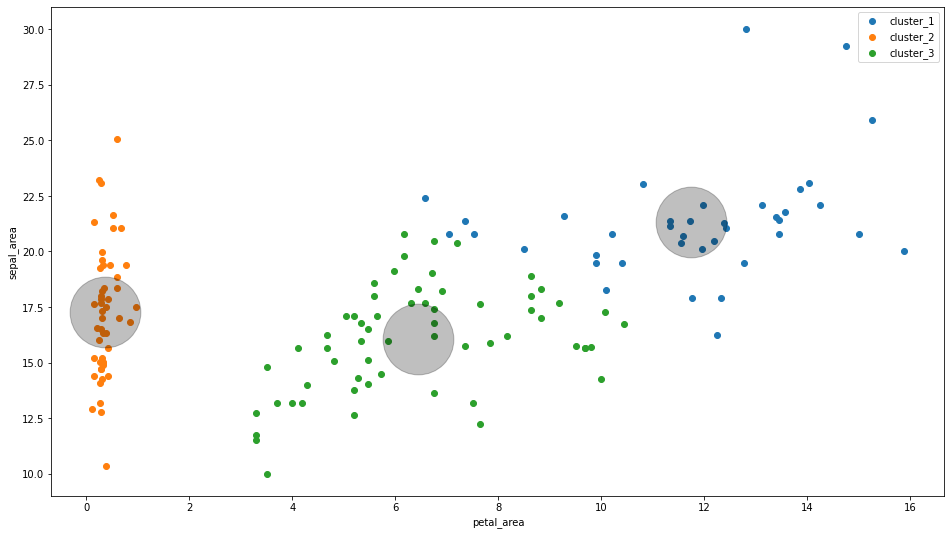

In [7]:
plt.figure(figsize=(16, 9))
for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.petal_area, subset.sepal_area, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

centroids.plot.scatter(y='sepal_area', x='petal_area', ax=plt.gca(), alpha=.25, s=5000, c='black')
plt.legend()

## Next let's look at the inertia plot for this set of features

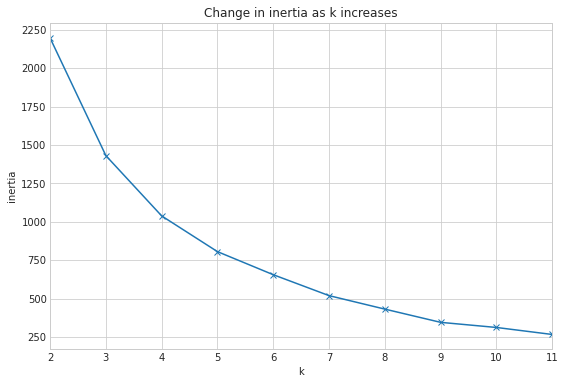

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## Now let's use do it again with three features

In [9]:
X = iris[['sepal_length', 'petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster'] = kmeans.predict(X)
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,cluster
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70,1
115,6.4,3.2,5.3,2.3,virginica,12.19,20.48,2
13,4.3,3.0,1.1,0.1,setosa,0.11,12.90,1
83,6.0,2.7,5.1,1.6,versicolor,8.16,16.20,0
107,7.3,2.9,6.3,1.8,virginica,11.34,21.17,2
55,5.7,2.8,4.5,1.3,versicolor,5.85,15.96,0
29,4.7,3.2,1.6,0.2,setosa,0.32,15.04,1
117,7.7,3.8,6.7,2.2,virginica,14.74,29.26,2
74,6.4,2.9,4.3,1.3,versicolor,5.59,18.56,0
87,6.3,2.3,4.4,1.3,versicolor,5.72,14.49,0


Text(0.5, 0, 'petal_width')

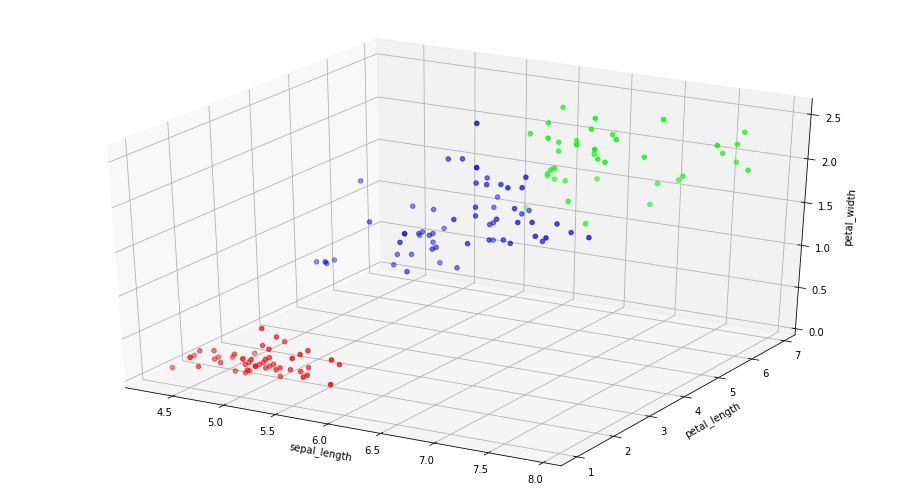

In [18]:
fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection="3d")

ax.scatter3D(iris.sepal_length, iris.petal_length, iris.petal_width, c=iris.cluster, cmap='brg')
ax.set_xlabel('sepal_length')
ax.set_ylabel('petal_length')
ax.set_zlabel('petal_width')

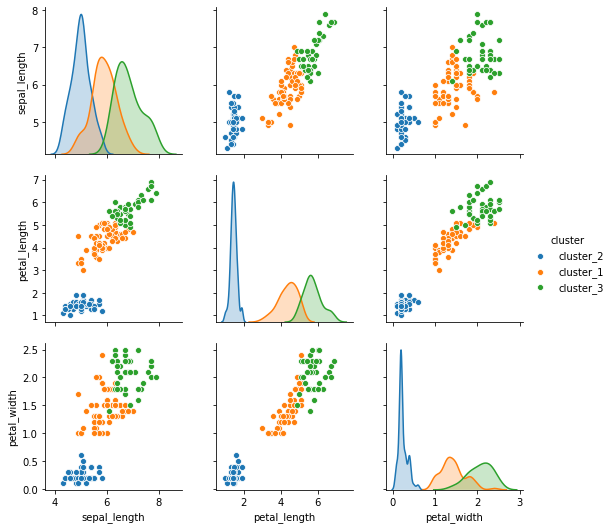

In [25]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='cluster')

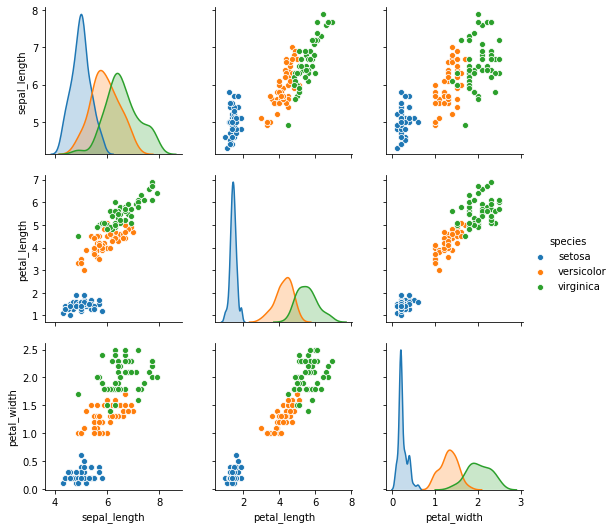

In [20]:
df = iris[['sepal_length', 'petal_length', 'petal_width', 'species', 'cluster']]
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.pairplot(df, hue='species')